In [93]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [98]:
import pandas as pd
import csv
import numpy as np
file1_1 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_cl_RT_value_file.txt", header=None, delimiter=' ')
file3_1 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_cl_RT_value_file.txt", header=None, delimiter=' ')
file1_2 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part5_cl_RT_value_file.txt", header=None, delimiter=' ')
file3_2 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_cl_RT_value_file.txt", header=None, delimiter=' ')

for i in [0, 1, 2]:
    file1_1[i] = file1_1[i].astype(int)
    file3_1[i] = file3_1[i].astype(int)
    file1_2[i] = file1_2[i].astype(int)
    file3_2[i] = file3_2[i].astype(int)
    
for i in [3, 4, 5, 6]:
    file1_1[i] = file1_1[i].astype(float)
    file3_1[i] = file3_1[i].astype(float)
    file1_2[i] = file1_2[i].astype(float)
    file3_2[i] = file3_2[i].astype(float)

#file1_1 - mid 1 server 1 -1 -1
#file3_1 = mid 1 server 3 -1  1
#file1_2 = mid 2 server 1  1 -1
#file3_2 = mid 2 server 3  1  1
#w 8 = -1
#w 32 = 1

# -1 -1 -1 
str1 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1 -1  -1
str2 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1  1 -1
str3 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1  1  -1
str4 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1 -1 1
str5 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]
# 1 -1  1
str6 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# -1  1 1
str7 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# 1 1 1
str8 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

y0 = float(str1[3])
y1 = float(str2[3])
y2 = float(str3[3])
y3 = float(str4[3])
y4 = float(str5[3])
y5 = float(str6[3])
y6 = float(str7[3])
y7 = float(str8[3])


I = [1, 1, 1, 1, 1, 1, 1, 1]
A = [-1, 1, -1, 1, -1, 1, -1, 1]
B = [-1, -1, 1, 1, -1, -1, 1, 1]
C = [-1, -1, -1, -1, 1, 1, 1, 1]
AB = [1, -1, -1, 1, 1, -1, -1, 1]
AC = [1, -1, 1, -1, -1, 1, -1, 1]
BC = [1, 1, -1, -1, -1, -1, 1, 1]
ABC = [-1, 1, 1, -1, 1, -1, -1, 1]
y = [y0, y1, y2, y3, y4, y5, y6, y7]
q0 = sum(np.multiply(y, I)) / 8
qA = sum(np.multiply(y, A)) / 8
qB = sum(np.multiply(y, B)) / 8
qC = sum(np.multiply(y, C)) / 8
qAB = sum(np.multiply(y, AB)) / 8
qAC = sum(np.multiply(y, AC)) / 8
qBC = sum(np.multiply(y, BC)) / 8
qABC = sum(np.multiply(y, ABC)) / 8

SSY = 0
for i in [4, 5, 6]:
    SSY += (float(str1[i]) * float(str1[i]) + float(str2[i]) * float(str2[i]) +
            float(str3[i]) * float(str3[i]) + float(str4[i]) * float(str4[i]) +
            float(str5[i]) * float(str5[i]) + float(str6[i]) * float(str6[i]) +
            float(str7[i]) * float(str7[i]) + float(str8[i]) * float(str8[i]))
SSA = 24 * qA * qA
SSB = 24 * qB * qB
SSC = 24 * qC * qC
SSAB = 24 * qAB * qAB
SSAC = 24 * qAC * qAC
SSBC = 24 * qBC * qBC
SSABC = 24 * qABC * qABC
SS0 = 24 * q0 * q0
SST = SSY - SS0
SSE = SST - (SSA + SSB + SSC + SSAB + SSAC + SSBC + SSABC)
print("Percentage middlware=" + str(SSA * 100 / SST))
print("Persentage server=" + str(SSB * 100 / SST))
print("Percentage workers=" + str(SSC * 100 / SST))
print("Percentage middleware+server=" + str(SSAB * 100 / SST))
print("Percentage middleware+workers=" + str(SSAC * 100 / SST))
print("Percentage server+workers=" + str(SSBC * 100 / SST))
print("Percentage of all factors=" + str(SSABC * 100 / SST))
print("Percentage of errors=" + str(SSE * 100 / SST))

print(" 1 middleware, 1 server, 8 workers:\n", float(str1[3]))
print(" 2 middlewares, 1 server, 8 workers:\n", float(str2[3]))
print(" 1 middleware, 3 servers, 8 workers:\n", float(str3[3]))
print(" 2 middlewares, 3 servers: 8 workers:\n", float(str4[3]))
print(" 1 middleware, 1 server, 32 workers:\n", float(str5[3]))
print(" 2 middlewares, 1 server, 32 workers:\n", float(str6[3]))
print(" 1 middleware, 3 servers, 32 workers:\n", float(str7[3]))
print(" 2 middlewares, 3 servers: 32 workers:\n", float(str8[3]))

7    16.678858
Name: 3, dtype: float64 7    15.854991
Name: 4, dtype: float64 7    16.660666
Name: 5, dtype: float64 7    17.520917
Name: 6, dtype: float64
7    11.338613
Name: 3, dtype: float64 7    11.351933
Name: 4, dtype: float64 7    11.234016
Name: 5, dtype: float64 7    11.42989
Name: 6, dtype: float64
7    21.020989
Name: 3, dtype: float64 7    21.119648
Name: 4, dtype: float64 7    21.374472
Name: 5, dtype: float64 7    20.568846
Name: 6, dtype: float64
7    10.189811
Name: 3, dtype: float64 7    10.125747
Name: 4, dtype: float64 7    10.192053
Name: 5, dtype: float64 7    10.251633
Name: 6, dtype: float64
23    8.953593
Name: 3, dtype: float64 23    8.91497
Name: 4, dtype: float64 23    8.976912
Name: 5, dtype: float64 23    8.968897
Name: 6, dtype: float64
23    7.949957
Name: 3, dtype: float64 23    7.951258
Name: 4, dtype: float64 23    7.956526
Name: 5, dtype: float64 23    7.942086
Name: 6, dtype: float64
23    8.956968
Name: 3, dtype: float64 23    9.020291
Name: 4, dty

In [99]:
for i in [4, 5, 6]:
    file1_1[i] = file1_1[i] - file1_1[3]
    file3_1[i] = file3_1[i] - file3_1[3]
    file1_2[i] = file1_2[i] - file1_2[3]
    file3_2[i] = file3_2[i] - file3_2[3]
    
str1 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1 -1  -1
str2 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1  1 -1
str3 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1  1  -1
str4 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1 -1 1
str5 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]
# 1 -1  1
str6 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# -1  1 1
str7 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# 1 1 1
str8 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]


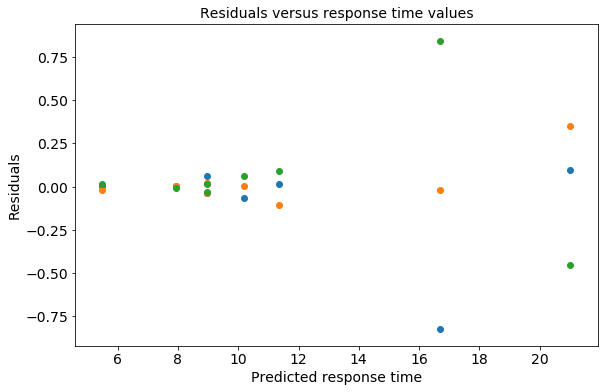

In [100]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([float(str1[4]), float(str2[4]), float(str3[4]), float(str4[4]), 
     float(str5[4]), float(str6[4]), float(str7[4]), float(str8[4])])
x2 = np.array([float(str1[5]), float(str2[5]), float(str3[5]), float(str4[5]), 
     float(str5[5]), float(str6[5]), float(str7[5]), float(str8[5])])
x3 = np.array([float(str1[6]), float(str2[6]), float(str3[6]), float(str4[6]), 
     float(str5[6]), float(str6[6]), float(str7[6]), float(str8[6])])

y = np.array([y0, y1, y2, y3, y4, y5, y6, y7])

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(y, x1)
plt.scatter(y, x2)
plt.scatter(y, x3)
plt.title('Residuals versus response time values')
plt.tight_layout(0)
plt.xlabel('Predicted response time')
plt.ylabel('Residuals')
plt.savefig("additive_residuals_response.pdf")

plt.show()
#errors negligible, this is not a concern
#page 190 for mean
#problem with 8 woker threads and 1,3 servers - 

[-0.82386678 -0.45214215 -0.10459711 -0.0640642  -0.03862333 -0.0349727
 -0.02835055 -0.02004895 -0.01819197 -0.00787079  0.00130146  0.00224234
  0.00561558  0.00656933  0.01331988  0.01443337  0.015304    0.02331933
  0.06182186  0.06332325  0.09127723  0.09865904  0.35348311  0.84205874]


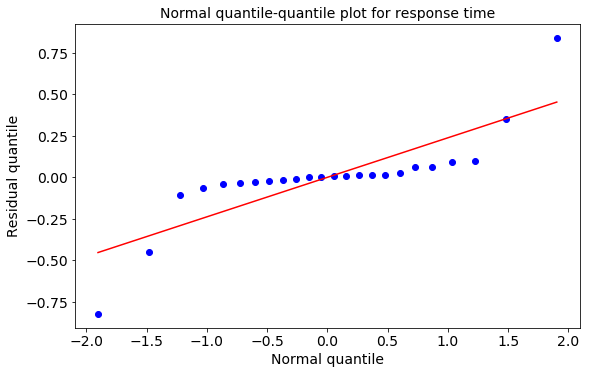

In [101]:
x = np.concatenate((x1, x2, x3), axis=None)
x = np.sort(x, axis=None)  
print(x)
import pylab 
import scipy.stats as stats

pylab.figure(figsize=(8, 5))
stats.probplot(x, dist="norm", plot=pylab)
pylab.title("Normal quantile-quantile plot for response time")
pylab.xlabel("Normal quantile")
pylab.ylabel("Residual quantile")
pylab.tight_layout(0)
pylab.savefig("additive_quantile_response.pdf")
pylab.show()